In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
from pydataset import data
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

df = pd.read_csv('C:\\Users\\mou95504\\Desktop\\code\\Advertising.csv')
df = df.drop(columns = 'Unnamed: 0')
print(df)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [14]:
# TV, Radio, and Newspaper 86%
# X = df.iloc[:, :-1]

# TV and Radio 86%
X = df.iloc[:, [0, 1]]

# TV and Newspaper 72%
# X = df.iloc[:, [0, 2]]

# Radio and Newspaper 21%
# X = df.iloc[:, [1, 2]]

# TV 67%
# X = df.iloc[:, 0]

# Radio 22%
# X = df.iloc[:, 1]

# Newspaper -2%
# X = df.iloc[:, 2]

# Sales
y = df.iloc[:, 3]
X

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


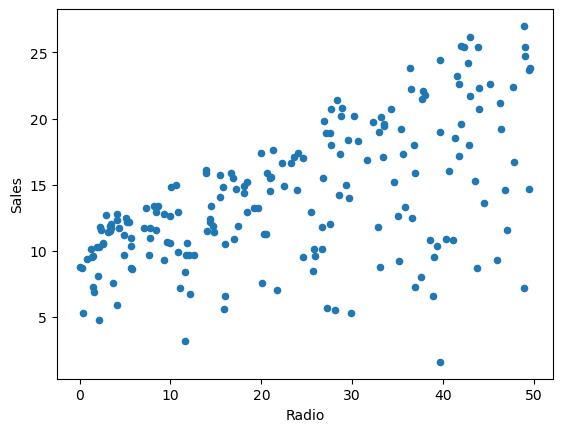

In [15]:
df.plot(kind = 'scatter', x = 'Radio', y = 'Sales')
plt.show()

In [16]:
# ## Needed for creating 3D axes
# from mpl_toolkits import mplot3d

# fig_9 = plt.figure(figsize=(8,5),dpi=100)
# axes_9 = fig_9.add_axes([0.1,0.1,0.9,0.9], projection='3d')

# # Create a 3D scatterplot
# # Te darker points are represented that way to seem closer to you
# z_3 = df.iloc[:, 3]
# x_3 = df.iloc[:, 0]
# y_3 = df.iloc[:, 1]

# # Set labels for the axes
# # fig_9.set_xlabel('X Label')
# # fig_9.set_ylabel('Y Label')
# # fig_9.set_zlabel('Z Label')


# axes_9.scatter3D(x_3, y_3, z_3)

In [17]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Generate random data
# # np.random.seed(42)

# x= df.iloc[:, 0]
# y= df.iloc[:, 1]
# z= df.iloc[:, 3]

# # colors = np.random.rand(200)

# # Create 3D scatter plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# # ax.scatter(x, y, z, marker='o')
# ax.scatter(x, y, z)

# # Set labels for the axes
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# # Show the plot
# plt.show()


In [18]:
# import matplotlib.pyplot as plt

# ax = plt.axes(projection = "3d")
# ax.scatter(3,5,7)
# plt.show()

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
# y_pred

Text(0, 0.5, 'original y (y_test)')

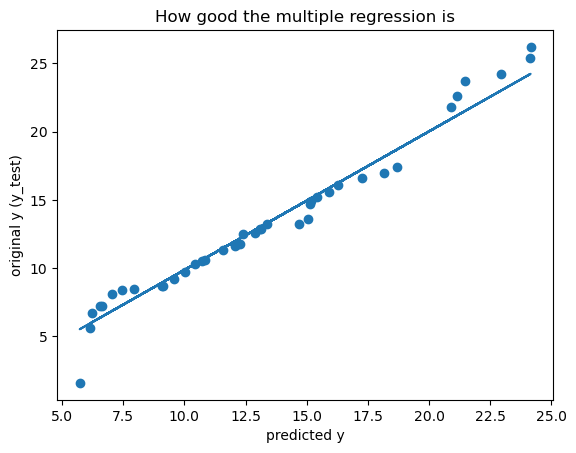

In [22]:
# checking the relationship between multiple independent variables and one dependent variable

# Import Matplotlib and allow plots to show in the Jupyter Notebook
import matplotlib.pyplot as plt
%matplotlib inline
# Import NumPy and Pandas
import numpy as np
import pandas as pd

new_x = y_pred
new_y = y_test
weird_regressor = LinearRegression()
weird_regressor.fit(new_x.reshape(-1,1), new_y)
weird_pred = weird_regressor.predict(new_x.reshape(-1,1))


# Display plot with x & y
plt.scatter(sorted(y_pred), sorted(y_test))
plt.plot(new_x.reshape(-1,1), weird_pred)
# Add a title
plt.title('How good the multiple regression is')
# Add an X & Y Label
plt.xlabel('predicted y')
plt.ylabel('original y (y_test)')
# If not in Jupyter Notebook use
# plt.show()

# the graph shows a solid linear relationship between IV (TV and Radio) and the DV (Sales)

Text(0, 0.5, 'Risiduals (y_test - y_pred)')

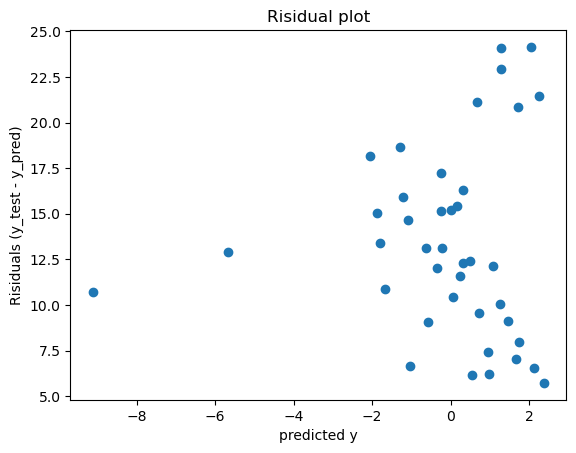

In [23]:
# checking if there is a non-linear relationship between our IV and DV
# Is there a non-linear relationship? (if there is a trend in this graph then the answer is YES)
# Display plot with x & y
plt.scatter(y_test-y_pred, y_pred)
# Add a title
plt.title('Risidual plot')
# Add an X & Y Label
plt.xlabel('predicted y')
plt.ylabel('Risiduals (y_test - y_pred)')
# If not in Jupyter Notebook use
# plt.show()

In [24]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.8604541663186569